# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. This project is not meant to be a robust financial analysis or be taken as financial advice.
- - - 
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.
- - -
In this section we will learn how to use pandas to directly read data from Google finance using pandas!

Pandas datareader allows you to read stock information directly from the internet. 

In [1]:
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

- - -

Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
3. Figure out how to use datareader to grab info on the stock.

- - -

Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)
- - -

In [2]:
#Functions from pandas_datareader.data and pandas_datareader.wb extract data from various Internet sources into a pandas DataFrame. 
from pandas_datareader import data, wb
from datetime import datetime
start = datetime(2006, 1, 1)
end = datetime(2016, 1, 1)
BAC = data.DataReader("BAC", 'google', start, end)
BAC.loc['2014-08-31']
#UPDATE 2025: Google Finance discontinued its public API for stock data years ago, and pandas_datareader 
# no longer supports 'google' as a source. 

NotImplementedError: data_source='google' is not implemented

### WARNING: 
**`pandas_datareader.DataReader` is often unreliable or broken because Yahoo frequently changes its webpage/API structure, causing the Yahoo reader to sometimes fail to parse the data.**

**Instead, we can use the `yfinance` library, which is specifically designed to handle Yahoo Finance’s quirks and is much more robust and actively maintained.**
- - -

In [3]:
import yfinance as yf
from datetime import datetime

start = "2006-01-01"
end = "2016-01-01"

BAC = yf.download("BAC", start=start, end=end, auto_adjust=False)
BAC.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BAC,BAC,BAC,BAC,BAC,BAC
Date,,,,,,
2006-01-03,30.991039,47.080002,47.180000,46.150002,46.919998,16296700
2006-01-04,30.661905,46.580002,47.240002,46.450001,47.000000,17757900
2006-01-05,30.701410,46.639999,46.830002,46.320000,46.580002,14970700
2006-01-06,30.655329,46.570000,46.910000,46.349998,46.799999,12599800
2006-01-09,30.675083,46.599998,46.970001,46.360001,46.720001,15619400


In [4]:
# Access data for a specific date
print(BAC.loc['2014-08-29']) 

Price      Ticker
Adj Close  BAC       1.282798e+01
Close      BAC       1.609000e+01
High       BAC       1.614000e+01
Low        BAC       1.602000e+01
Open       BAC       1.605000e+01
Volume     BAC       5.010660e+07
Name: 2014-08-29 00:00:00, dtype: float64


Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers

In [5]:
# CitiGroup
C = yf.download("C", start=start, end=end)

# Goldman Sachs
GS = yf.download("GS", start=start, end=end)

# JPMorgan Chase
JPM = yf.download("JPM", start=start, end=end)
# Morgan Stanley
MS = yf.download("MS", start=start, end=end)


# Wells Fargo
WFC = yf.download("WFC", start=start, end=end)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.

In [6]:
for df in [BAC, C, GS, JPM, MS, WFC]:
    df.columns = df.columns.get_level_values(0)

tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

Set the column name levels (this is filled out for you):

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

Check the head of the bank_stocks dataframe.

In [8]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info   Adj Close      Close       High        Low       Open    Volume   
Date                                                                           
2006-01-03   30.991039  47.080002  47.180000  46.150002  46.919998  16296700   
2006-01-04   30.661905  46.580002  47.240002  46.450001  47.000000  17757900   
2006-01-05   30.701410  46.639999  46.830002  46.320000  46.580002  14970700   
2006-01-06   30.655329  46.570000  46.910000  46.349998  46.799999  12599800   
2006-01-09   30.675083  46.599998  46.970001  46.360001  46.720001  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info        Close        High         Low        Open  ...      Close   
Date                                                         ...              
2006-01-03   321.442719  322.029646  313.747405  319.551499  ...  31.934687   
2006-01-04   315.508148  320.203606  315.312512  318.638460  ...  31.956587   
2006-01-05   317.073364  318.116782  315.638635  315.899490  ...  32.044197   
2006-01-06   317.073364  318.899365  314.334343  318.768928  ...  32.077065   
2006-01-09   315.573334  317.855844  314.986407  316.942844  ...  32.416611   

Bank Ticker                                                  WFC             \
Stock Info        High        Low       Open   Volume      Close       High   
Date                                                                          
2006-01-03   32.033268  31.074844  31.310340  5377000  18.675648  18.719556   
2006-01-04   32.465921  31.956587  32.148273  7977800  18.459040  18.628818   
2006-01-05   32.088012  31.775840  32.066104  5778000  18.438551  18.473677   
2006-01-06   32.230412  31.792276  32.186599  6889800  18.546850  18.602467   
2006-01-09   32.471379  32.104439  32.109917  4144500  18.543928  18.631746   

Bank Ticker                                  
Stock Info         Low       Open    Volume  
Date                                         
2006-01-03   18.262910  18.500015  11016400  
2006-01-04   18.362441  18.617109  10870000  
2006-01-05   18.330243  18.441478  10158000  
2006-01-06   18.374144  18.488306   8403800  
2006-01-09   18.473676  18.543928   5619600  

[5 rows x 31 columns]

### A pickle file is also provided by the tutor for reading the data.

**Note that the data obtained from yfinance differs from the data stored in the pickle file. To maintain consistency with the tutor’s materials and the course, we will proceed using the data from the pickle file.**

In [9]:
all_banks = pd.read_pickle('all_banks.pkl') 
all_banks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

What is the max Close price for each bank's stock throughout the time period?

In [10]:
all_banks.xs('Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [11]:
returns = pd.DataFrame()

We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.

In [12]:
# pct_change() automatically applies the return formula:

close_prices = all_banks.xs('Close', axis=1, level='Stock Info')
returns = close_prices.pct_change()
returns.head()

# The first row contains NaN values because there's no previous price to compare.

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


In [13]:
#Alternative way using the formula: (p_t / p_{t-1}) - 1:

p_t = all_banks.xs('Close', axis=1, level='Stock Info')
returns = (p_t / p_t.shift(1)) - 1
returns.head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?

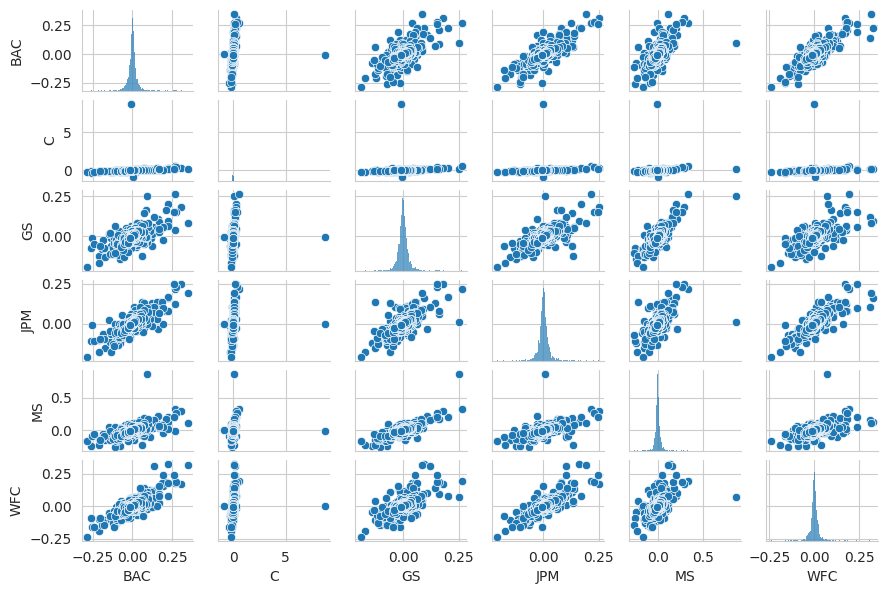

In [14]:
import seaborn as sns
sns.set_style('whitegrid')
sns.pairplot(returns[1:], height=1., aspect=1.5)

**See the enormous crash in value in the stock price plot**

Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?

In [15]:
returns.idxmin()

Bank Ticker
BAC   2009-01-20
C     2011-05-06
GS    2009-01-20
JPM   2009-01-20
MS    2008-10-09
WFC   2009-01-20
dtype: datetime64[ns]

##### **Answer:**
**The worst Drop for 4 of them happened on the United States Inauguration Day 2009, when Barack Obama was inaugurated as the president of the United States.**

In [16]:
returns.idxmax()

Bank Ticker
BAC   2009-04-09
C     2011-05-09
GS    2008-11-24
JPM   2009-01-21
MS    2008-10-13
WFC   2008-07-16
dtype: datetime64[ns]

##### **Answer:**
**Citigroup underwent a stock split on May 9, 2011. Additionally, JPM experienced its biggest gain the day after the inauguration.**

Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?

In [17]:
returns.std()

Bank Ticker
BAC    0.036650
C      0.179969
GS     0.025346
JPM    0.027656
MS     0.037820
WFC    0.030233
dtype: float64

##### **Answer:**
**Citigroup stock is the riskiest over the entire period with the highest standard deviation.**

In [18]:
returns.loc['2015'].std()

Bank Ticker
BAC    0.016163
C      0.015289
GS     0.014046
JPM    0.014017
MS     0.016249
WFC    0.012591
dtype: float64

##### **Answer:**
**Although very similar, Morgan Stanley and Bank of America have a higher risk profile.**

Create a distplot using seaborn of the 2015 returns for Morgan Stanley

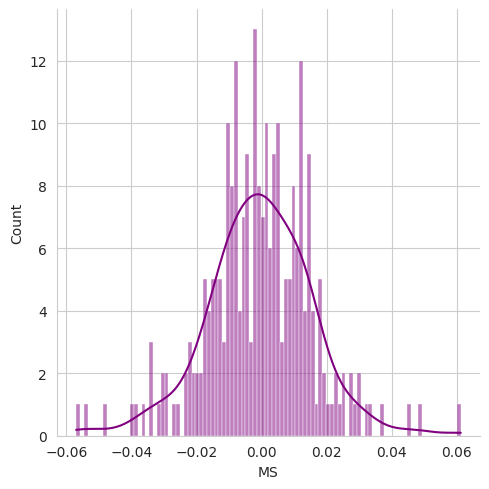

In [19]:
sns.displot(returns.loc['2015']['MS'], color='purple', kde=True, bins=100)

Create a distplot using seaborn of the 2008 returns for CitiGroup

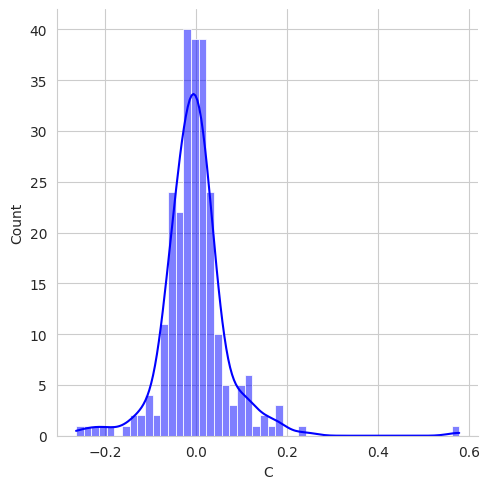

In [20]:
sns.displot(returns.loc['2008']['C'], color='blue', kde=True, bins=50)

Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)

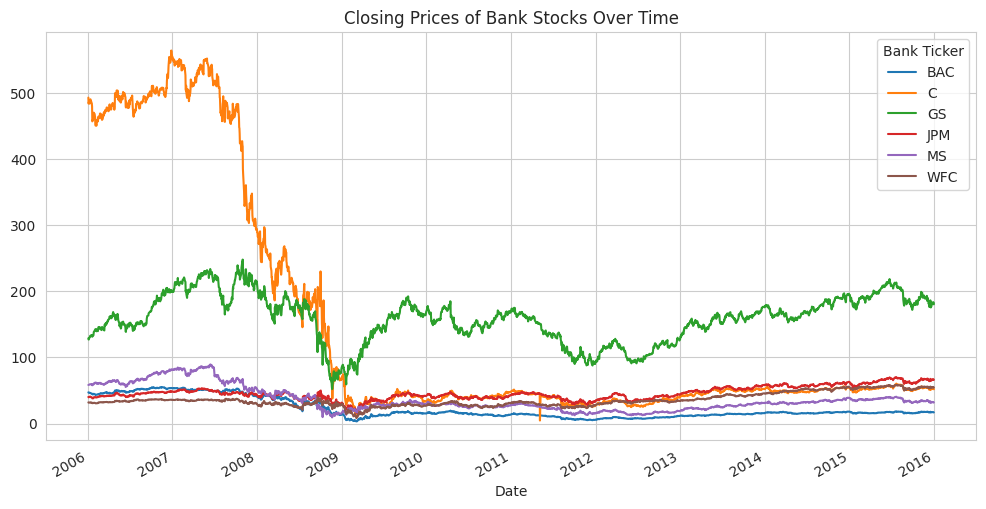

In [21]:
# Option 1 (with .xs):
import matplotlib.pyplot as plt

bank_close = all_banks.xs(key='Close', axis=1, level='Stock Info')

bank_close.plot(figsize=(12,6), title="Closing Prices of Bank Stocks Over Time")
plt.xlabel("Date")
plt.show()

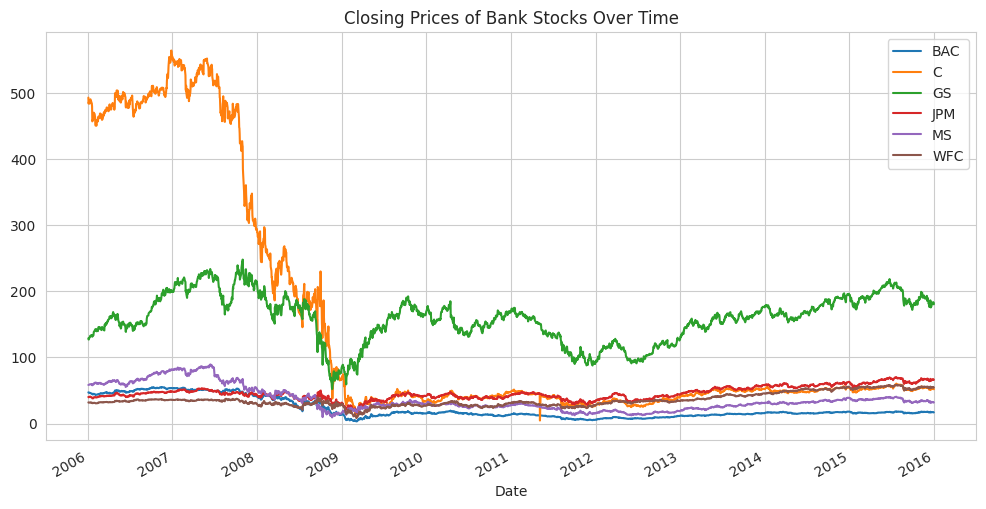

In [22]:
# Option 2 (for loop):
plt.figure(figsize=(12,6))
for bank in all_banks.columns.levels[0]:
    all_banks[bank]['Close'].plot(label=bank)

plt.legend()
plt.title("Closing Prices of Bank Stocks Over Time")
plt.xlabel("Date")
plt.show()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008

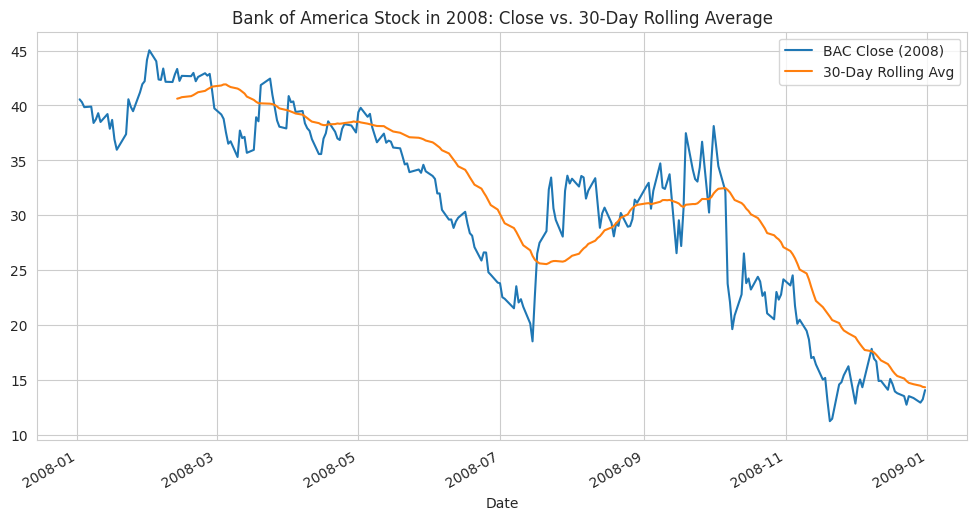

In [23]:
bac_2008 = bank_stocks['BAC']['Close']['2008']

# Calculate 30-day rolling average
bac_rolling_30 = bac_2008.rolling(window=30).mean()

plt.figure(figsize=(12,6))
bac_2008.plot(label='BAC Close (2008)')
bac_rolling_30.plot(label='30-Day Rolling Avg')

plt.title("Bank of America Stock in 2008: Close vs. 30-Day Rolling Average")
plt.xlabel("Date")
plt.legend()
plt.show()

Create a heatmap of the correlation between the stocks Close Price

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

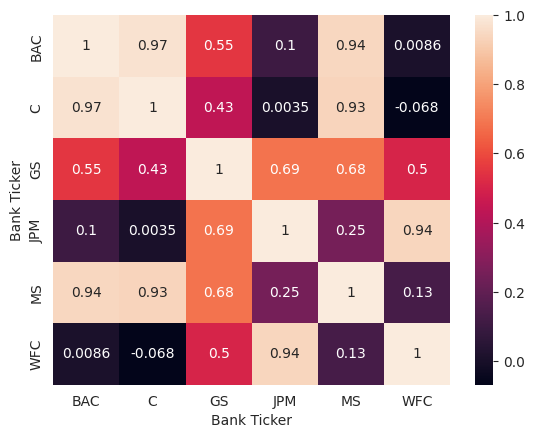

In [24]:
sns.heatmap(all_banks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

Use seaborn's clustermap to cluster the correlations together

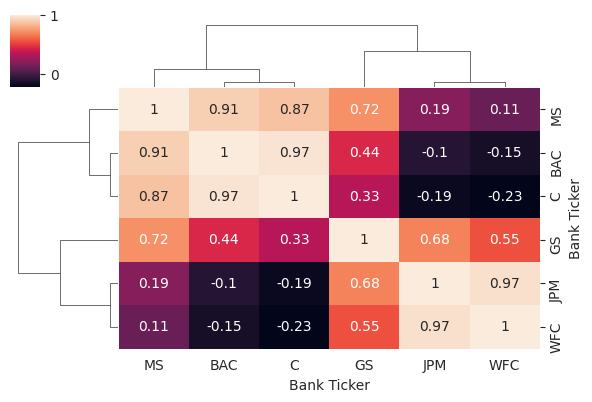

In [138]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),figsize=(6, 4), annot=True)